# Machine Learning on Text: Clustering Assignment

In [1]:
import pandas as pd
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus.reader.plaintext import PlaintextCorpusReader
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


### Ingest the company_profiles data set into a corpus.

In [3]:
DOC_PATTERN = r'.*\.txt'
path = '/content/drive/MyDrive/content/AP_News'
corpus = PlaintextCorpusReader(path, DOC_PATTERN)

### Create a list of documents by extracting the raw text for each fileid in the corpus.

In [4]:
docs = [corpus.raw(fileid) for fileid in corpus.fileids()]

### Preprocess the documents, including the steps below.

- Word tokenize the document.
- Lowercase all tokens.
- Lemmatize and stem the tokens.
- Remove stop words and punctuation.

In [6]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
def preprocess(docs):
  lemmatizer = WordNetLemmatizer()
  stemmer = SnowballStemmer('english')
  preprocessed = []

  for doc in docs:
    tokenized = word_tokenize(doc)

    cleaned = [stemmer.stem(lemmatizer.lemmatize(token.lower()))
               for token in tokenized
               if not token.lower() in stopwords.words('english')
               if token.isalpha()]

    untokenized = " ".join(cleaned)
    preprocessed.append(untokenized)

  return preprocessed

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [8]:
preprocessed = preprocess(docs)

### TF-IDF vectorize the preprocessed documents.

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectorized = vectorizer.fit_transform(preprocessed)

### Determine the optimal number of clusters using the Yellowbrick library's KElbow Visualizer and a KMeans clustering algorithm.

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f276456dcc0>,
                 k=None, metric=None, model=None, timings=True)

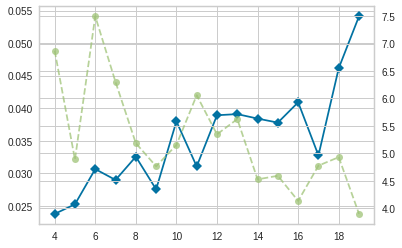

In [15]:
model = KMeans(n_clusters=5)
clusters = model.fit_predict(vectorized)
visualizer = KElbowVisualizer(model, k=(4,20), metric='silhouette')
visualizer.fit(vectorized)

### Perform K-Means Clustering using the optimal number of clusters determine in the previous step.

In [18]:
model = KMeans(n_clusters = 20)
clusters = model.fit_predict(vectorized)

### Perform Agglomerative Clustering using the same number of clusters.

In [23]:
model = AgglomerativeClustering(n_clusters=20)
agg_clusters = model.fit_predict(vectorized.toarray())

### Choose one of the three topic modeling approaches covered. Cluster into the optimal number of clusters and extract 5 keywords that represent the documents in each cluster.

In [26]:
from sklearn.decomposition import NMF
num_keywords = 5
num_topics = 20

model = NMF(n_components=num_topics)

model.fit_transform(vectorized)

results = [[(vectorizer.get_feature_names()[i], topic[i])
            for i in topic.argsort()[:-num_keywords - 1:-1]]
           for topic in model.components_]

topics = [[x[0] for x in i] for i in results]

In [27]:
topics

[['trump', 'ukrain', 'hous', 'committe', 'democrat'],
 ['yard', 'game', 'touchdown', 'nfl', 'pas'],
 ['compani', 'amazon', 'said', 'onlin', 'govern'],
 ['rose', 'trade', 'stock', 'fell', 'point'],
 ['market', 'analysi', 'global', 'forecast', 'tenni'],
 ['bloomberg', 'woman', 'sander', 'candid', 'democrat'],
 ['student', 'school', 'campus', 'univers', 'counselor'],
 ['buttigieg', 'peter', 'school', 'kid', 'friend'],
 ['vape', 'flavor', 'ban', 'product', 'tobacco'],
 ['navi', 'gallagh', 'spencer', 'esper', 'seal'],
 ['ohio', 'state', 'buckey', 'penn', 'game'],
 ['outbreak', 'vaccin', 'health', 'romain', 'case'],
 ['patient', 'doctor', 'ai', 'artifici', 'program'],
 ['uber', 'driver', 'london', 'safeti', 'passeng'],
 ['internet', 'iran', 'iranian', 'govern', 'violenc'],
 ['epstein', 'said', 'prison', 'jail', 'kill'],
 ['team', 'leagu', 'win', 'mourinho', 'birdi'],
 ['mental', 'harri', 'health', 'treatment', 'plan'],
 ['penni', 'syria', 'kurdish', 'syrian', 'iraq'],
 ['biden', 'democrat', 